In [2]:
import pandas as pd

file_path = 'data/processed_bert.csv'
data = pd.read_csv(file_path)

data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Columns: 770 entries, 0 to text
dtypes: float64(768), int64(1), object(1)
memory usage: 44.7+ MB


(None,
           0         1         2         3         4         5         6  \
 0 -0.822546 -0.472057 -0.579868  0.601334  0.001131 -0.033307  0.621883   
 1 -0.932106 -0.444832 -0.946184  0.783482  0.649199 -0.417868  0.810984   
 2 -0.786213 -0.454594 -0.989117  0.766382  0.825029 -0.260707  0.601579   
 3 -0.929848 -0.641187 -0.984187  0.838084  0.698074 -0.439465  0.848216   
 4 -0.782167 -0.475203 -0.785371  0.579609  0.718675 -0.169704  0.333027   
 
           7         8         9  ...       760       761       762       763  \
 0  0.219169 -0.297440 -0.999933  ...  0.746353  0.789280  0.454223  0.652186   
 1  0.553593 -0.841144 -0.999991  ...  0.972591  0.666550 -0.809021  0.077952   
 2  0.324533 -0.961853 -0.999995  ...  0.992954  0.505823 -0.130431 -0.429334   
 3  0.544355 -0.940431 -0.999996  ...  0.995336  0.807030 -0.736760 -0.092651   
 4  0.279532 -0.594330 -0.999871  ...  0.968012  0.792530  0.080506  0.567232   
 
         764       765       766       767  tar

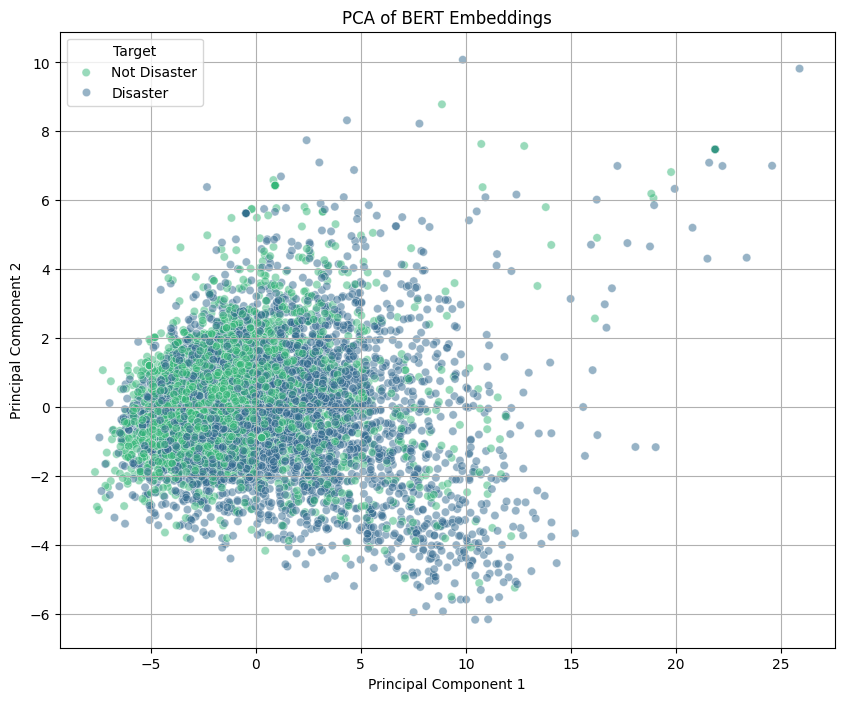

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X = data.iloc[:, :-2] 
y = data['target']

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


pca_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
pca_df['Target'] = y


plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=pca_df, palette='viridis', alpha=0.5)
plt.title('PCA of BERT Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target', labels=['Not Disaster', 'Disaster'])
plt.grid(True)
plt.show()
